# Setup the Runtime

## Setup the Workspace

In [1]:
def isGoogleColab():
    try:
        import google.colab
        return True
    except ImportError as e:
        return False

In [2]:
if isGoogleColab():
    from google.colab import drive
    google_drive_root = "/content/drive/MyDrive"
    # This will prompt for authorization.
    drive.mount(google_drive_root)
    workdir = f"{google_drive_root}/Colab Notebooks/miniai"
else:
  workdir = '.'

In [3]:
import os
os.chdir(workdir)

import sys
sys.path.append(workdir)

## Configure Conda Environment

In [4]:
if isGoogleColab():
    import pip
    pip.main(["install", "-q", "condacolab"])
    import condacolab
    condacolab.check()
    condacolab.install()
else:
    print("Ignoring the installation of conda for Google Colab")

Ignoring the installation of conda for Google Colab


In [5]:
# Heading with exclamation mark will execute the command, we use it to install required libraries
!conda --version

conda 23.5.0


In [6]:
#!conda update -y -q -c conda-forge conda

## Install the dependencies

In [7]:
#!conda env update --file f"$workdir/environment.yml"

## Load the dependencies

In [8]:
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code
%autoreload 1
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import torch
import torchvision
%aimport miniai

## Load GPU

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
if device.type == 'cuda':
  print(torch.cuda.get_device_name(0))
  print('Memory Usage:')
  print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
  print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cpu


## Verify The Enviroment

In [10]:
print("Operating system: ", sys.platform)
print("Python version", sys.version)
print("Numpy version: ", np.__version__)
print("Pytorch version: ", torch.__version__)

Operating system:  win32
Python version 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:15:42) [MSC v.1916 64 bit (AMD64)]
Numpy version:  1.23.5
Pytorch version:  2.0.1


## Configure Tensorboard

In [11]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

!rm -rdf runs
%tensorboard --logdir "runs"

'rm' is not recognized as an internal or external command,
operable program or batch file.


Reusing TensorBoard on port 6006 (pid 14664), started 1:10:17 ago. (Use '!kill 14664' to kill it.)

# Linear Regression

## With Manual Gradient

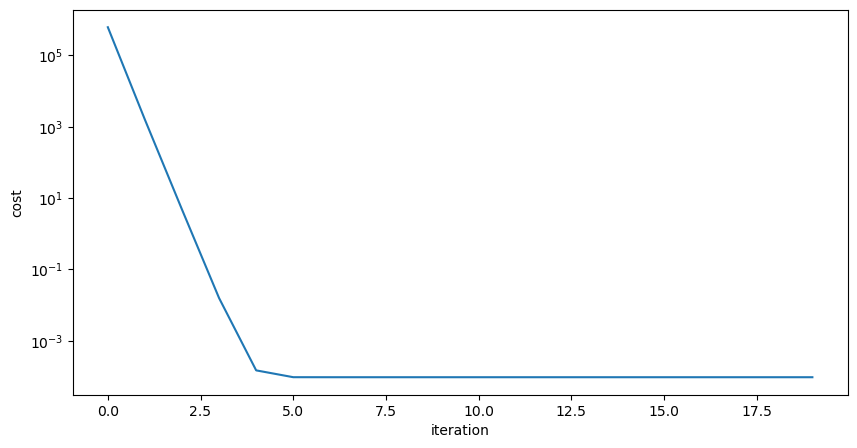

Best parameters is  {'w': array([196.99969094]), 'b': array([769.00012218])}


In [12]:
miniai.demo.regression.show_demo()

## With Pytorch Auto-Gradient

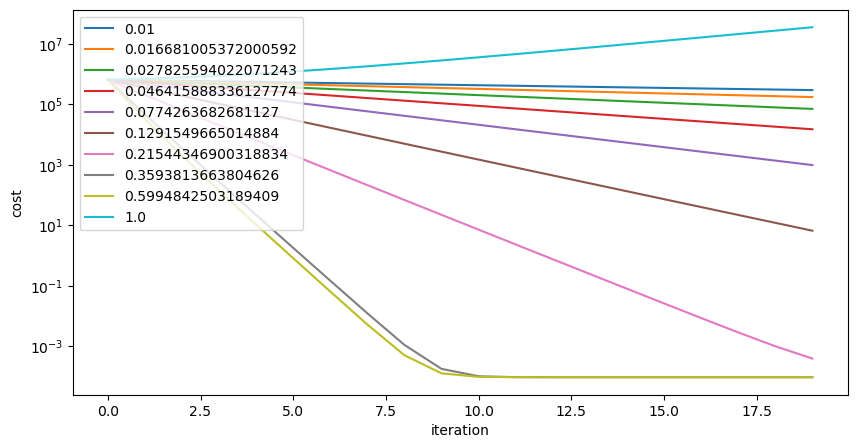

In [13]:
miniai.demo.autograd.show_demo()